In [4]:
import requests
import pandas as pd
import csv
import numpy as np 
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR, DateTime
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker, declarative_base
import logging

In [118]:
# url = "https://jobicy.p.rapidapi.com/api/v2/jobs"

# # Request headers
# headers = {
#     "X-RapidAPI-Key": "d193e29157msh16cba69f1b99500p1aa91cjsn89fb8a04c8a6",
#     "X-RapidAPI-Host": "jobicy.p.rapidapi.com"
# }

# # Make the API request
# response = requests.get(url, headers=headers)

# # Check if the request was successful
# if response.status_code == 200:
#     # Convert the JSON response to a pandas DataFrame
#     data = response.json()['jobs']
#     df = pd.DataFrame(data)
    
#     # Save the DataFrame to a CSV file
#     df.to_csv('jobs1.csv', index=False)
    
#     print("Data has been successfully saved to 'jobs1.csv'")
# else:
#     print(f"Error in obtaining data: {response.status_code}")

Data has been successfully saved to 'jobs1.csv'


# EDA (Exploratory Data Analysis)

We start by reading our csv:

In [70]:
jobs1 = pd.read_csv('../Data/jobs1.csv')
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [6]:
jobs1.shape

(3755, 11)

In [5]:
jobs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In this analysis, we can see that we have no null values in our dataset, which is significant for our work.

In the following graph we can see what type of data we are working with:

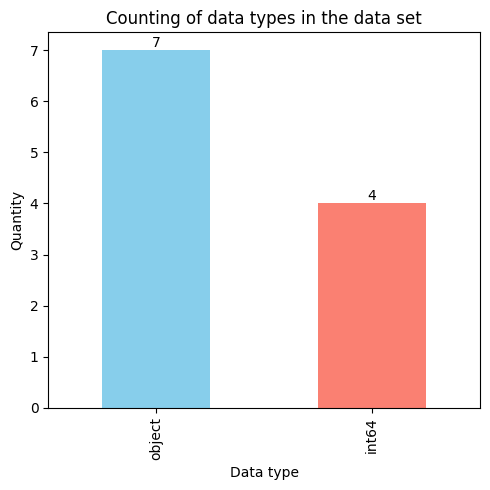

In [4]:
data_types_counts = jobs1.dtypes.value_counts()


colors = ['skyblue', 'salmon', 'green']

plt.figure(figsize=(5, 5))
bar_plot = data_types_counts.plot(kind='bar', color=colors)

plt.xlabel('Data type')
plt.ylabel('Quantity')
plt.title('Counting of data types in the data set')


for i, value in enumerate(data_types_counts):
    plt.text(i, value + 0, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In this case, we are only working with two data types "object" with 7 columns, and "integer" with 4.

Now, let us review the unique values per columns:

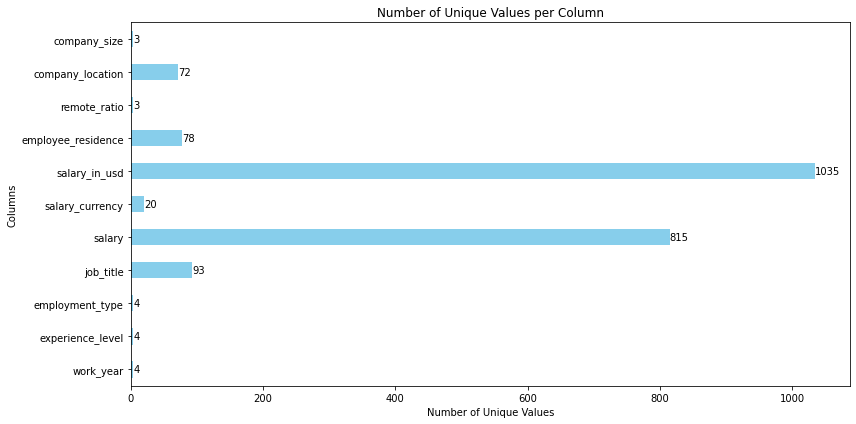

In [7]:
unique_counts = jobs1.nunique()


colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = unique_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Unique Values')
plt.title('Number of Unique Values per Column')


for i, value in enumerate(unique_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

As we can see, taking into account the amount of data, it is visible that values are repeated.

We use this ".tail" method to see the last records of our dataset, and thus have a more visible comparison of the data we are working with.

In [6]:
jobs1.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


And here we realize something, and that is that we are not only working with a single year as we thought, but we also have 2020 and 2021 as we see there.

With that in mind, let's see what years we are working with:

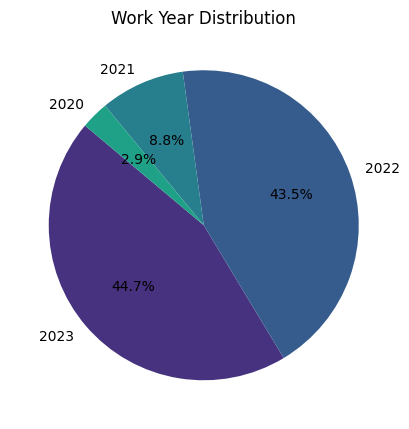

In [36]:
work_year_counts = jobs1['work_year'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(work_year_counts, labels=work_year_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Work Year Distribution')
plt.show()

Now, reviewing this "work year distribution", we can see that the years range from 2020 to 2023.

The distribution of working years shows a significant increase in observations from 2021 onwards, with particularly marked growth in 2022 and 2023. This suggests that the dataset has been collected or updated to a large extent in these recent years. The progressive increase in observations from 2022 to 2023 indicates a greater representation of more recent data in the total set, which may reflect an intensification of work activities or an increased focus on collecting updated information in these years. This increase in recent data may be related to a greater focus on current labor market trends and emerging labor dynamics during these years.

Let's see the salary currency Distribution

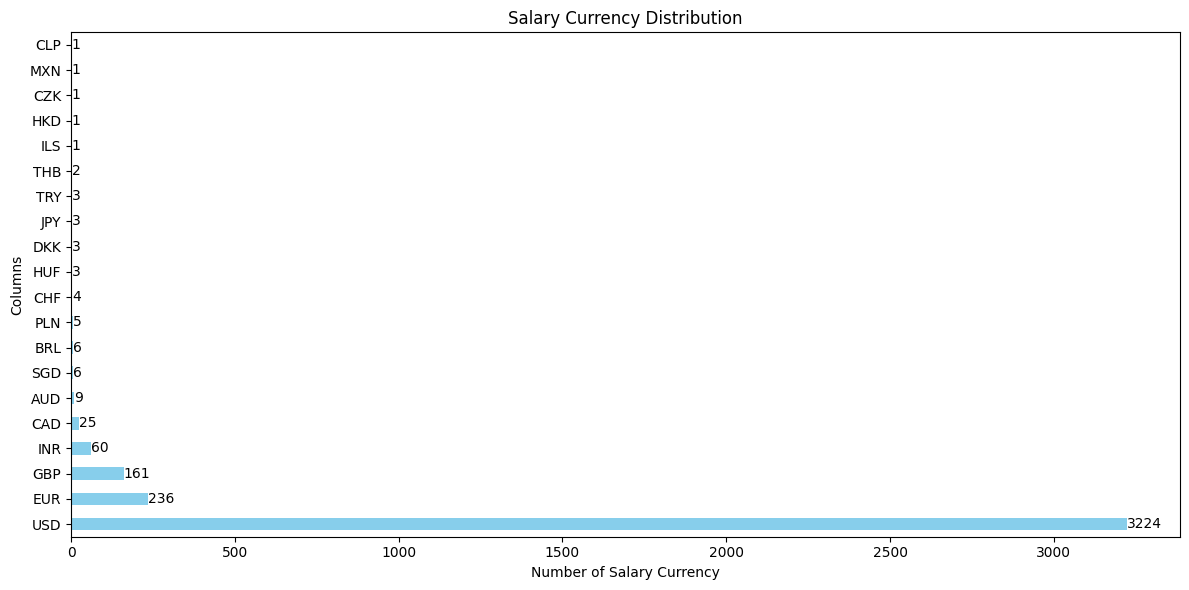

In [10]:
work_year_counts = jobs1['salary_currency'].value_counts()

colors = ['skyblue']

plt.figure(figsize=(12, 6)) 
bar_plot = work_year_counts.plot(kind='barh', color=colors)

plt.ylabel('Columns')
plt.xlabel('Number of Salary Currency')
plt.title('Salary Currency Distribution')


for i, value in enumerate(work_year_counts):
    plt.text(value, i, str(value), ha='left', va='center')


plt.tight_layout()
plt.show()

In the analysis conducted, it was observed that the majority of salary offers are in U.S. dollars (USD), with a total of 3,224 records. This finding suggests that the dominant currency in the job offers analyzed is the US dollar, which may be indicative of the prevalence of job offers from US companies or the importance of the US labor market in the data set studied. This data is relevant to understand the nature of the labor market we are analyzing and may influence hiring and salary negotiation strategies.

With these results in mind, let's look at the salary range in "USD":

In [12]:
min_salary= jobs1['salary_in_usd'].min()

max_salary= jobs1['salary_in_usd'].max()

print("The salary range is: "+ str(min_salary)+ " to " + str(max_salary))

The salary range is: 5132 to 450000


Here we can observe something rare, and that is that the maximum salary found is 450,000 dollars, an extremely high value to be earned annually by an employee. Here we realized that we had outliers.
Later we will see what we can do with this kind of data.

Let's take a look at the "remote_ratio" column to know its distribution:

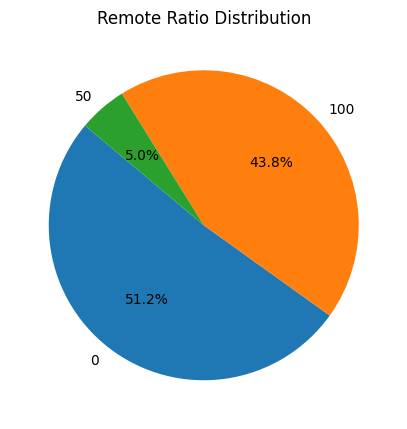

In [19]:
remote_ratiocount = jobs1['remote_ratio'].value_counts()
plt.figure(figsize=(5, 8))
plt.pie(remote_ratiocount, labels=remote_ratiocount.index, autopct='%1.1f%%', startangle=140)
plt.title('Remote Ratio Distribution')
plt.show()

here we saw the unique values of the "remote_ratio" column, where we can see that we only have 3 unique values. At first we thought that the column gave us information about how many jobs are remote and how many are not, we expected a different distribution, and looking ahead, we do not believe that it will contribute something to our analysis since it will have very even values.
This means that in many records certain values are repeated.


### Transformations:

Let's look at the duplicate values:

In [30]:
jobs1.duplicated().sum()

1171

1. Transformation #1: Drop duplicates

In [31]:
jobs1=jobs1.drop_duplicates()
jobs1.duplicated().sum()

0

Initially, there were 1171 duplicate entries in the dataset. However, we have successfully removed these duplicate rows, ensuring data integrity for our analysis.

These observations assure us that our dataset is in good shape and suitable for further analysis and insights.

In [71]:
unique_experience_levels = jobs1['experience_level'].unique()
unique_employment_types = jobs1['employment_type'].unique()
unique_company_sizes = jobs1['company_size'].unique()

print("Unique Experience Levels:", unique_experience_levels)
print("Unique Employment Types:", unique_employment_types)
print("Unique Company Sizes:", unique_company_sizes)

Unique Experience Levels: ['SE' 'MI' 'EN' 'EX']
Unique Employment Types: ['FT' 'CT' 'FL' 'PT']
Unique Company Sizes: ['L' 'S' 'M']


2. Transformation #2: Replace values

In [72]:
# Replace specific values in the 'experience_level' column
jobs1.loc[:, 'experience_level'] = jobs1['experience_level'].replace({
    'EN': 'Entry Level',
    'EX': 'Experienced',
    'MI': 'Mid-Level',
    'SE': 'Senior'  # Corregido el typo de 'Seniour' a 'Senior'
})

# Replace specific values in the 'employment_type' column
jobs1.loc[:, 'employment_type'] = jobs1['employment_type'].replace({
    'FT': 'Full time',
    'PT': 'Part time',
    'CT': 'Contractor',
    'FL': 'Freelancer'
})

# Replace specific values in the 'company_size' column
jobs1.loc[:, 'company_size'] = jobs1['company_size'].replace({
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'  # Corregido el typo de 'small' a 'Small'
})


Next, we can already see that the changes have been made perfectly.

In [73]:
jobs1.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,ES,100,ES,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,US,100,US,Small


3. But, we also noticed a small problem, and that is that in company_location and employee_residence, we have the abbreviations of the locations. To solve that, we will take out the unique values of both columns, investigating what those values are.

In [74]:
unique_locations = jobs1['company_location'].unique()
print(unique_locations)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']


In [75]:
mapping = {'ES': 'Spain', 'US': 'United States', 'CA': 'Canada', 'DE': 'Germany', 'GB': 'United Kingdom', 'NG': 'Nigeria', 'IN': 'India', 'HK': 'Hong Kong', 'NL': 'Netherlands', 'CH': 'Switzerland', 'CF': 'Central African Republic', 'FR': 'France', 'FI': 'Finland', 'UA': 'Ukraine', 'IE': 'Ireland', 'IL': 'Israel', 'GH': 'Ghana', 'CO': 'Colombia', 'SG': 'Singapore', 'AU': 'Australia', 'SE': 'Sweden', 'SI': 'Slovenia', 'MX': 'Mexico', 'BR': 'Brazil', 'PT': 'Portugal', 'RU': 'Russia', 'TH': 'Thailand', 'HR': 'Croatia', 'VN': 'Vietnam', 'EE': 'Estonia', 'AM': 'Armenia', 'BA': 'Bosnia and Herzegovina', 'KE': 'Kenya', 'GR': 'Greece', 'MK': 'North Macedonia', 'LV': 'Latvia', 'RO': 'Romania', 'PK': 'Pakistan', 'IT': 'Italy', 'MA': 'Morocco', 'PL': 'Poland', 'AL': 'Albania', 'AR': 'Argentina', 'LT': 'Lithuania', 'AS': 'American Samoa', 'CR': 'Costa Rica', 'IR': 'Iran', 'BS': 'Bahamas', 'HU': 'Hungary', 'AT': 'Austria', 'SK': 'Slovakia', 'CZ': 'Czech Republic', 'TR': 'Turkey', 'PR': 'Puerto Rico', 'DK': 'Denmark', 'BO': 'Bolivia', 'PH': 'Philippines', 'BE': 'Belgium', 'ID': 'Indonesia', 'EG': 'Egypt', 'AE': 'United Arab Emirates', 'LU': 'Luxembourg', 'MY': 'Malaysia', 'HN': 'Honduras', 'JP': 'Japan', 'DZ': 'Algeria', 'IQ': 'Iraq', 'CN': 'China', 'NZ': 'New Zealand', 'CL': 'Chile', 'MD': 'Moldova', 'MT': 'Malta'}

jobs1['company_location'] = jobs1['company_location'].map(mapping)

In [76]:
unique_locations = jobs1['employee_residence'].unique()
print(unique_locations)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


In [77]:
jobs1['employee_residence'] = jobs1['employee_residence'].map({'ES': 'Spain', 'US': 'United States', 'CA': 'Canada', 'DE': 'Germany', 'GB': 'United Kingdom', 'NG': 'Nigeria', 'IN': 'India', 'HK': 'Hong Kong', 'PT': 'Portugal', 'NL': 'Netherlands', 'CH': 'Switzerland', 'CF': 'Central African Republic', 'FR': 'France', 'AU': 'Australia', 'FI': 'Finland', 'UA': 'Ukraine', 'IE': 'Ireland', 'IL': 'Israel', 'GH': 'Ghana', 'AT': 'Austria', 'CO': 'Colombia', 'SG': 'Singapore', 'SE': 'Sweden', 'SI': 'Slovenia', 'MX': 'Mexico', 'UZ': 'Uzbekistan', 'BR': 'Brazil', 'TH': 'Thailand', 'HR': 'Croatia', 'PL': 'Poland', 'KW': 'Kuwait', 'VN': 'Vietnam', 'CY': 'Cyprus', 'AR': 'Argentina', 'AM': 'Armenia', 'BA': 'Bosnia and Herzegovina', 'KE': 'Kenya', 'GR': 'Greece', 'MK': 'North Macedonia', 'LV': 'Latvia', 'RO': 'Romania', 'PK': 'Pakistan', 'IT': 'Italy', 'MA': 'Morocco', 'LT': 'Lithuania', 'BE': 'Belgium', 'AS': 'American Samoa', 'IR': 'Iran', 'HU': 'Hungary', 'SK': 'Slovakia', 'CN': 'China', 'CZ': 'Czech Republic', 'CR': 'Costa Rica', 'TR': 'Turkey', 'CL': 'Chile', 'PR': 'Puerto Rico', 'DK': 'Denmark', 'BO': 'Bolivia', 'PH': 'Philippines', 'DO': 'Dominican Republic', 'EG': 'Egypt', 'ID': 'Indonesia', 'AE': 'United Arab Emirates', 'MY': 'Malaysia', 'JP': 'Japan', 'EE': 'Estonia', 'HN': 'Honduras', 'TN': 'Tunisia', 'RU': 'Russia', 'DZ': 'Algeria', 'IQ': 'Iraq', 'BG': 'Bulgaria', 'JE': 'Jersey', 'RS': 'Serbia', 'NZ': 'New Zealand', 'MD': 'Moldova', 'LU': 'Luxembourg', 'MT': 'Malta'})

In [78]:
jobs1.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,Spain,100,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,United States,100,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,United States,100,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000,Canada,100,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000,Canada,100,Canada,Medium


Now we can see some of our transformations done as we wanted, although there are some jobs that have the same attributes, but the only thing that changes is the salary, where we concluded that it is different company names that have them. Unfortunately this dataset does not contain the company name to broaden the focus of our analysis a bit more, but that's ok.

We can also see that in the table, we have two columns with salaries, "salary" and "salary_in_usd", and this changes as not all jobs share the same currency, because of the countries.

As one of our focus is to look at U.S. wages, let's look at a boxplot to see if we have outliers.

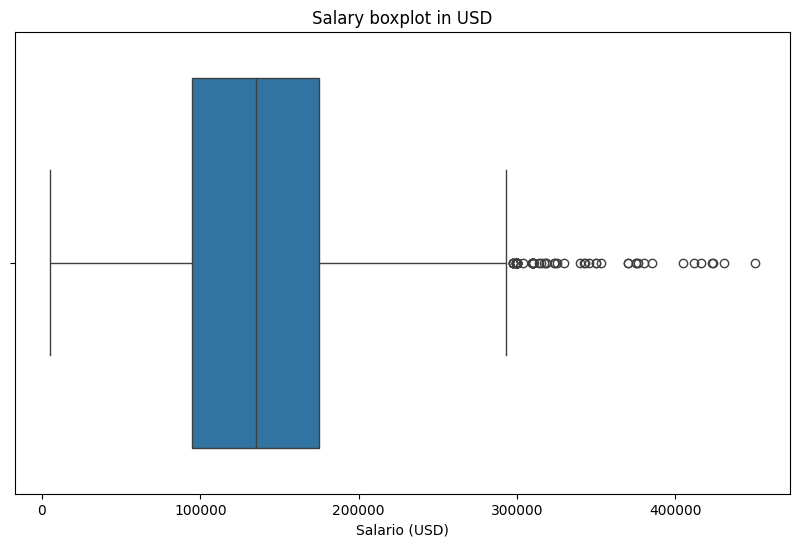

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=jobs1['salary_in_usd'])


plt.title('Salary boxplot in USD')
plt.xlabel('Salario (USD)')
plt.show()

As we can see, we do have outliers in our column, to solve this, we will use the interquantile rank (IQR)

In [47]:
Q1 = jobs1['salary_in_usd'].quantile(0.25)
Q3 = jobs1['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

jobs1['salary_in_usd'] = jobs1['salary_in_usd'].apply(lambda x: x if (x >= lower_bound and x <= upper_bound) else IQR)

Using IQR for data transformation is an effective practice that allows handling outliers that may distort the analysis or results. This technique helps to obtain a more accurate and robust representation of the data, which facilitates a more reliable and meaningful analysis.

We verify:

In [48]:
Q1 = jobs1['salary_in_usd'].quantile(0.25)
Q3 = jobs1['salary_in_usd'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = jobs1[(jobs1['salary_in_usd'] < lower_bound) | (jobs1['salary_in_usd'] > upper_bound)]

num_outliers = outliers.shape[0]

print(f"Number of outliers: {num_outliers}")

Number of outliers: 0


We launched another boxplot to see:

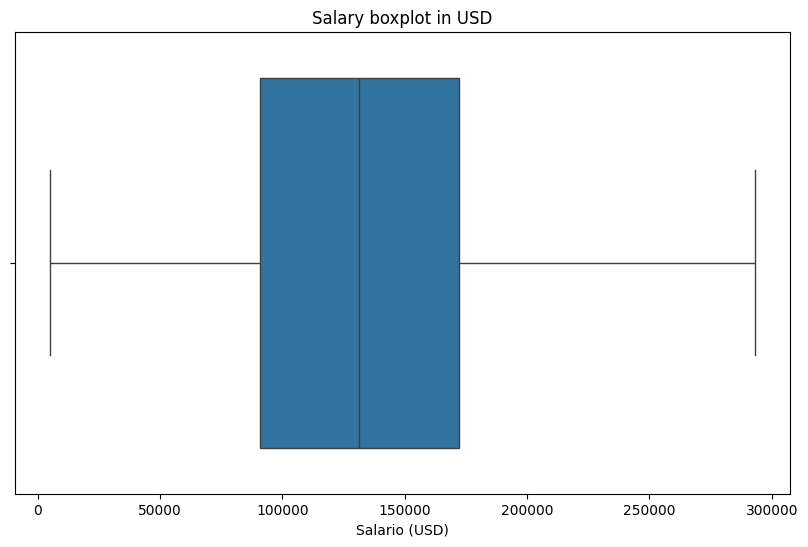

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=jobs1['salary_in_usd'])


plt.title('Salary boxplot in USD')
plt.xlabel('Salario (USD)')
plt.show()

In [50]:
min_salary= jobs1['salary_in_usd'].min()

max_salary= jobs1['salary_in_usd'].max()

print("The salary range is: "+ str(min_salary)+ " to " + str(max_salary))

The salary range is: 5132.0 to 293000.0


As we have seen, in the EDA we decided to eliminate the "remote_ratio" column, since it did not provide us with the information we wanted and therefore it will not be necessary in our analysis.

In [79]:
#Delete the 'remote_ratio' column
jobs1 = jobs1.drop('remote_ratio', axis=1)

In [86]:
jobs1.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')

## Some Graphs of Analysis after Transformations
Now, we will examine the unique values in certain columns, such as:

- Experience Level
- Employment Type
- Company Size


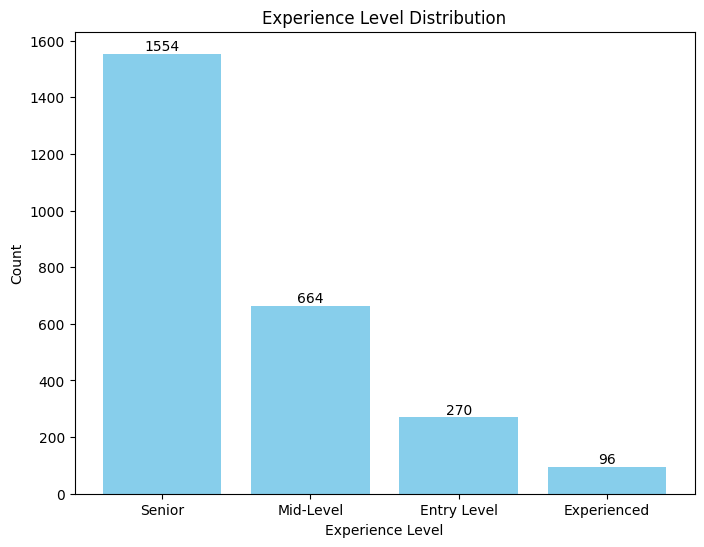

In [48]:
experience_level_counts = jobs1["experience_level"].value_counts()


plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')


plt.title('Experience Level Distribution')
plt.xlabel('Experience Level')
plt.ylabel('Count')


plt.show()

Taking into account the results, we can concluded that the "Senior" category is the most predominant with a total of 1554 values. This information suggests that the "Senior" position is possibly the most common or in demand within the data set analyzed. This trend could indicate a significant preference or need to hire professionals with experience or advanced skills in the specific areas related to these positions. This observation could be useful for companies and recruiters in identifying labor market demands and adjusting their hiring strategies accordingly.

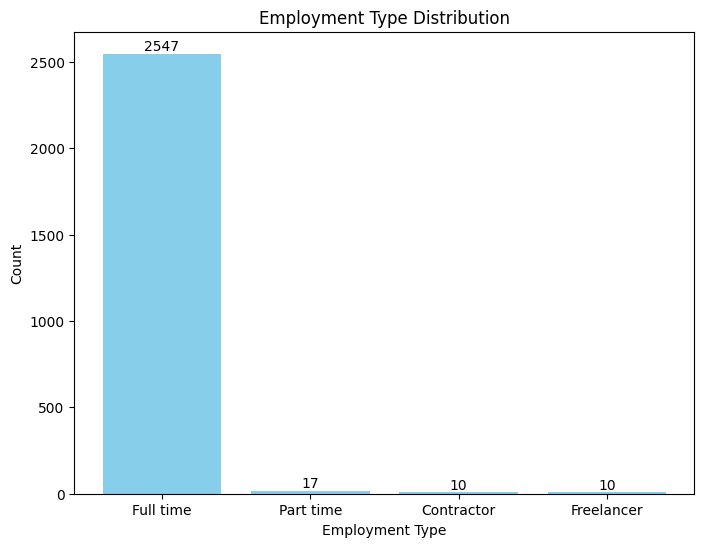

In [100]:
experience_level_counts = jobs1["employment_type"].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(experience_level_counts.index, experience_level_counts.values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')

plt.title('Employment Type Distribution')
plt.xlabel('Employment Type')
plt.ylabel('Count')

plt.show()

Based on the data provided, it can be concluded that the "Full time" employment type is the most predominant with a total of 2547 values. This information indicates that the majority of job opportunities within the dataset are for full-time positions. This trend may reflect a strong demand in the labor market for roles that require a full-time commitment, which may be indicative of an active economy and growing companies seeking full-time employees to meet their operational and strategic needs. This observation could be useful for candidates seeking employment, as they could focus their search efforts on full-time roles, which appear to be the most abundant in the current market.

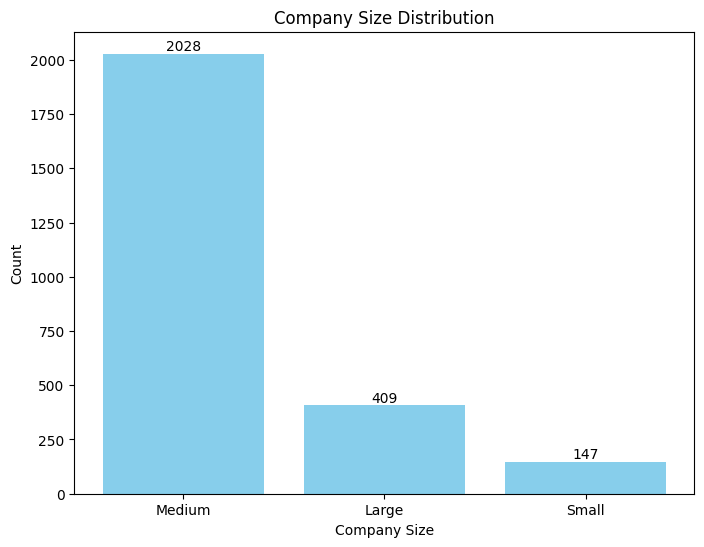

In [50]:
company_size_counts = jobs1["company_size"].value_counts()


plt.figure(figsize=(8, 6))
bars = plt.bar(company_size_counts.index, company_size_counts.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')


plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Count')


plt.show()

Based on the data provided, it can be concluded that "Medium" sized companies are the most represented in the data set, with a total of 2028 records. This information suggests that medium-sized companies may have a significant presence in the analyzed labor market. It is possible that these companies represent an attractive mix for employees, offering a balance of stability and growth opportunities, as well as a more dynamic and agile work environment compared to large corporations. For professionals seeking employment, this observation may be relevant, as they may consider focusing their search efforts on mid-sized companies that appear to offer a considerable amount of opportunities within the current labor market.

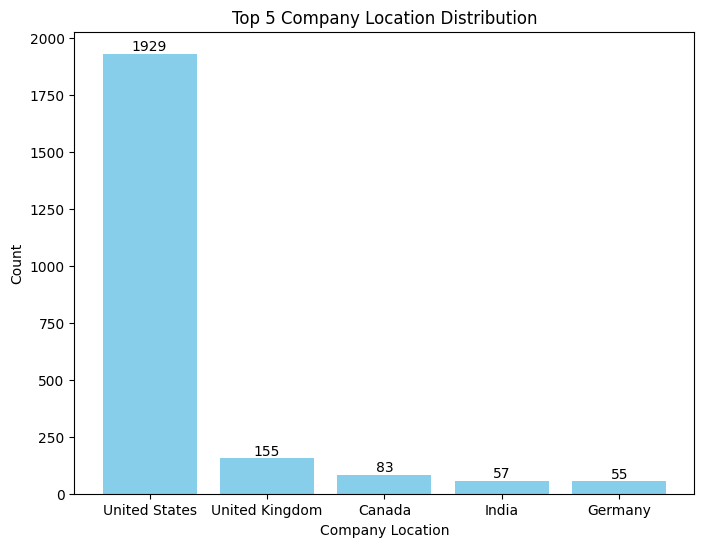

In [53]:
company_location_counts = jobs1["company_location"].value_counts().head()


plt.figure(figsize=(8, 6))
bars = plt.bar(company_location_counts.index, company_location_counts.values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 2), ha='center', va='bottom')


plt.title('Top 5 Company Location Distribution')
plt.xlabel('Company Location')
plt.ylabel('Count')


plt.show()

It can be concluded that "United States" leads the list with the highest number of companies compared to other countries in the dataset. This observation indicates a strong business presence and activity in the United States, which may reflect its robust economy and dominant role in the global business arena. This concentration of companies in the United States may offer a wide range of job and investment opportunities, making it a key market for professionals and companies. This trend can influence strategic decision making related to business expansion, investment in talent and exploration of market opportunities in the specific sector being analyzed.

In the following graph we can see a top, to see which is the most repeated work.

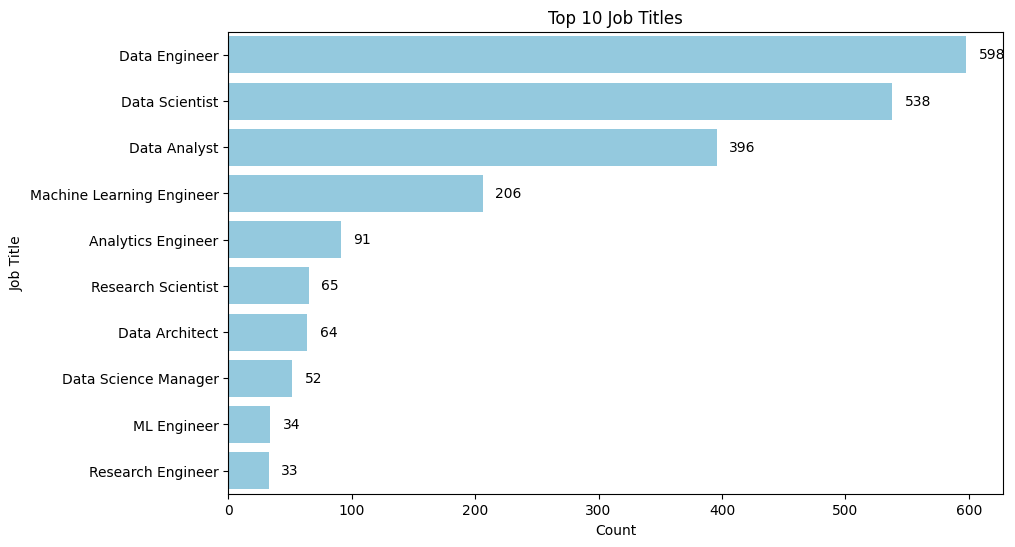

In [58]:
top_job_titles = jobs1['job_title'].value_counts().nlargest(10)


plt.figure(figsize=(10, 6))


barplot = sns.barplot(y=top_job_titles.index, x=top_job_titles.values, color='skyblue', order=top_job_titles.index)


for i in range(top_job_titles.shape[0]):
    barplot.text(top_job_titles.iloc[i] + 10, i, top_job_titles.iloc[i], va='center')


plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')


plt.show()


Looking at this result, it can be concluded that the position of "Data Engineer" is the most predominant with a total of 598 values in the analyzed dataset. This information suggests a significant demand in the labor market for professionals specialized in data engineering. The growing importance of data management and analytics in modern businesses could be driving this high demand for Data Engineer roles. For professionals seeking employment in this field, this observation indicates a strong presence of opportunities in data engineering roles, which could influence their career decisions and job search focus towards these in-demand positions.

Our final dataset would look like this with its respective transformations:

In [80]:
jobs1.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,Spain,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,United States,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,United States,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000,Canada,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000,Canada,Canada,Medium
5,2023,Senior,Full time,Applied Scientist,222200,USD,222200,United States,United States,Large
6,2023,Senior,Full time,Applied Scientist,136000,USD,136000,United States,United States,Large
7,2023,Senior,Full time,Data Scientist,219000,USD,219000,Canada,Canada,Medium
8,2023,Senior,Full time,Data Scientist,141000,USD,141000,Canada,Canada,Medium
9,2023,Senior,Full time,Data Scientist,147100,USD,147100,United States,United States,Medium


## Data to the Database:

In [81]:
file_path = '../Credentials/keys.json'
if os.path.exists(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        user = data["user"]
        password = data["password"]
        port = data["port"]
        server = data["server"]
        db = data["db"]
else:
    logging.info(f"File '{file_path}' not found.")
db_connection = f"postgresql://{user}:{password}@{server}:{port}/{db}"
engine = create_engine(db_connection)

### We create the table with the required columns:

In [82]:
Base = declarative_base()

class JobsNew(Base):
    __tablename__ = 'jobs_new'
    id = Column(Integer, primary_key=True, autoincrement=True)
    work_year = Column(Integer, nullable=False)
    experience_level = Column(String(100), nullable=False)
    employment_type = Column(String(100), nullable=False)
    job_title = Column(String(100), nullable=False)
    salary = Column(Integer, nullable=False)
    salary_currency = Column(String(100), nullable=False)
    salary_in_usd = Column(Integer, nullable=False)
    employee_residence = Column(String(100), nullable=False)
    company_location = Column(String(100), nullable=False)
    company_size = Column(String(100), nullable=False)

Base.metadata.create_all(engine)

#### We insert the data from the dataframe to the table created in postgresql:

In [83]:
jobs1.to_sql('jobs_new', engine, if_exists='replace', index=False)
logging.info("Data inserted")

#### We create the connection and read the data, to verify that everything worked.

In [84]:
connection = engine.connect() 
table_name = 'jobs_new'  
df = pd.read_sql_table(table_name, connection) 
jobs_new=df

This is our final table:

In [85]:
jobs_new.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size
0,2023,Senior,Full time,Principal Data Scientist,80000,EUR,85847,Spain,Spain,Large
1,2023,Mid-Level,Contractor,ML Engineer,30000,USD,30000,United States,United States,Small
2,2023,Mid-Level,Contractor,ML Engineer,25500,USD,25500,United States,United States,Small
3,2023,Senior,Full time,Data Scientist,175000,USD,175000,Canada,Canada,Medium
4,2023,Senior,Full time,Data Scientist,120000,USD,120000,Canada,Canada,Medium
